In [1]:
from keras.layers import Input, Lambda, Dense, Flatten
from keras.models import Model
from keras.applications.vgg16 import VGG16
from keras.applications.vgg16 import preprocess_input
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
import numpy as np
from glob import glob
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

In [2]:
IMAGE_SIZE = [224, 224]

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:
#Give dataset path
train_path = '/content/drive/MyDrive/DD/Train'
test_path = '/content/drive/MyDrive/DD/Test'

In [5]:
from PIL import Image 
import os 
from IPython.display import display
from IPython.display import Image as _Imgdis
# creating a object  

  
folder = train_path+'/Normal'


files = [f for f in os.listdir(folder) if os.path.isfile(os.path.join(folder, f))]
print("Working with {0} images".format(len(files)))
print("Image examples: ")


for i in range(10):
    print(files[i])
    display(_Imgdis(filename=folder + "/" + files[i], width=240, height=240))

Working with 19766 images
Image examples: 
d_3041.png


d_3116.png


d_3111.png


d_3093.png


d_2631.png


d_2673.png


d_2797.png


d_2929.png


d_2740.png


d_2978.png


In [6]:
vgg = VGG16(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)

58900480/58889256 [==============================] - 0s 0us/step


In [7]:
vgg.input

<KerasTensor: shape=(None, 224, 224, 3) dtype=float32 (created by layer 'input_1')>

In [8]:
for layer in vgg.layers:
  layer.trainable = False

In [9]:
folders = glob('/content/drive/MyDrive/Train/*')
print(len(folders))

3


In [10]:
x = Flatten()(vgg.output)
prediction = Dense(3, activation='softmax')(x)
model = Model(inputs=vgg.input, outputs=prediction)
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

In [11]:
from tensorflow.keras import optimizers


adam = optimizers.Adam()
model.compile(loss='sparse_categorical_crossentropy',
              optimizer=adam,
              metrics=['accuracy'])

In [12]:
train_datagen = ImageDataGenerator(
    preprocessing_function=preprocess_input,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest')

In [13]:
test_datagen = ImageDataGenerator(
    preprocessing_function=preprocess_input,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest')


In [14]:
train_set = train_datagen.flow_from_directory(train_path,
                                                 target_size = (224, 224, 3),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')


Found 19766 images belonging to 3 classes.


In [15]:
test_set = test_datagen.flow_from_directory(test_path,
                                            target_size = (224, 224, 3),
                                            batch_size = 32,
                                            class_mode = 'categorical')

Found 37484 images belonging to 3 classes.


In [16]:
from keras.preprocessing.image import ImageDataGenerator
from keras.applications.vgg16 import VGG16, preprocess_input
from keras import layers
from keras.models import Model, Sequential
from tensorflow.keras.optimizers import Adam, RMSprop
from keras.callbacks import EarlyStopping

In [17]:
IMG_SIZE = (224,224)
RANDOM_SEED = 123

TRAIN_DIR = '/content/drive/MyDrive/DD/Train/'
VAL_DIR = '/content/drive/MyDrive/DD/Test/'

train_datagen = ImageDataGenerator(
    rotation_range=15,
    width_shift_range=0.1,
    height_shift_range=0.1,
    shear_range=0.1,
    brightness_range=[0.5, 1.5],
    horizontal_flip=True,
    vertical_flip=True,
    preprocessing_function=preprocess_input
)

test_datagen = ImageDataGenerator(
    preprocessing_function=preprocess_input
)


train_generator = train_datagen.flow_from_directory(
    TRAIN_DIR,
    color_mode='rgb',
    target_size=IMG_SIZE,
    batch_size=32, #32
    class_mode='binary',
    seed=RANDOM_SEED
)


validation_generator = test_datagen.flow_from_directory(
    VAL_DIR,
    color_mode='rgb',
    target_size=IMG_SIZE,
    batch_size=16, #16
    class_mode='binary',
    seed=RANDOM_SEED
)

Found 132081 images belonging to 3 classes.
Found 37484 images belonging to 3 classes.


In [18]:
EPOCHS = 20
es = EarlyStopping(
    monitor='val_accuracy', 
    mode='max',
    patience=6
)

#history=model.fit(x_train, y_train, batch_size=10, steps_per_epoch=len(x_train)/100, epochs=30, validation_data=(x_test, y_test), callbacks=[reduce_lr])
history = model.fit(
    train_generator,
    steps_per_epoch=40,
    epochs=EPOCHS,
    validation_data=validation_generator,
    validation_steps=50,
    callbacks=[es]
)

Epoch 1/20
40/40 [==============================] - 1676s 42s/step - loss: 4.7142 - accuracy: 0.6125 - val_loss: 8.3170 - val_accuracy: 0.4638
Epoch 2/20
40/40 [==============================] - 1627s 41s/step - loss: 3.3763 - accuracy: 0.6508 - val_loss: 10.5604 - val_accuracy: 0.3088
Epoch 3/20
40/40 [==============================] - 1597s 40s/step - loss: 3.8606 - accuracy: 0.6539 - val_loss: 8.4145 - val_accuracy: 0.6313
Epoch 4/20
40/40 [==============================] - 1574s 40s/step - loss: 4.4804 - accuracy: 0.6719 - val_loss: 16.3238 - val_accuracy: 0.5412
Epoch 5/20
40/40 [==============================] - 1545s 39s/step - loss: 4.0727 - accuracy: 0.6969 - val_loss: 13.1226 - val_accuracy: 0.4112
Epoch 6/20
40/40 [==============================] - 1513s 38s/step - loss: 3.8109 - accuracy: 0.6992 - val_loss: 11.7133 - val_accuracy: 0.5525
Epoch 7/20
40/40 [==============================] - 1518s 38s/step - loss: 3.5039 - accuracy: 0.7211 - val_loss: 14.3478 - val_accuracy: 0

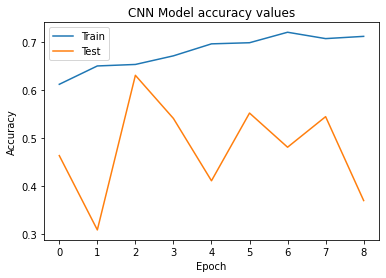

In [21]:
_# Plot training & validation loss values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('CNN Model accuracy values')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

In [22]:
#model = ...  # Get model (Sequential, Functional Model, or Model subclass)
model.save('VGG16.h5')